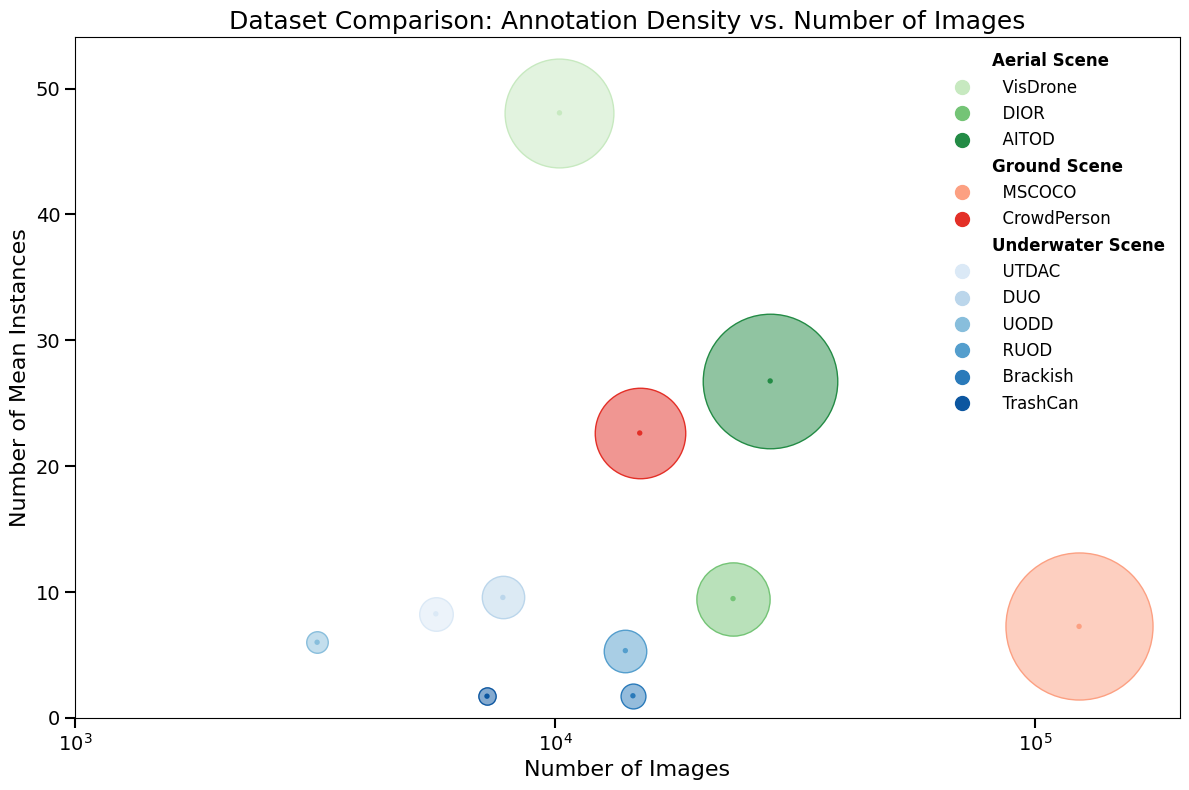

In [13]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgba  
from matplotlib.cm import get_cmap  
from matplotlib.ticker import FuncFormatter, LogLocator  
from matplotlib.lines import Line2D  

# 数据集名称  
names = ['UTDAC', 'DUO', 'UODD', 'RUOD', 'Brackish', 'TrashCan',  
         'MSCOCO', 'VisDrone', 'DIOR', 'CrowdPerson','AITOD']  

# 图像数量（x轴）  
x_values = np.array([5643, 7782, 3194, 14000, 14518, 7212,  
                     123287, 10209, 23463, 15000,28036])  

# 标注总数（用于气泡大小）  
sizes = np.array([46685, 74515, 19212, 74903, 25613, 12480,  
                  896782, 490759, 222472, 339565,750621])  

# 计算标注密度（y轴）  
annotation_density = sizes / x_values  

# 气泡大小（与标注总数相关）  
bubble_sizes = sizes / 80  # 调整除数以缩放气泡大小  

# 数据集分组  
underwater_datasets = ['UTDAC', 'DUO', 'UODD', 'RUOD', 'Brackish', 'TrashCan']  
remote_sensing_datasets = ['VisDrone', 'DIOR','AITOD']  
open_air_datasets = ['MSCOCO', 'CrowdPerson']  

# 为每个组创建色彩映射  
num_underwater = len(underwater_datasets)  
num_remote = len(remote_sensing_datasets)  
num_open_air = len(open_air_datasets)  

# 为每个数据集组使用不同的色系  
blues = plt.get_cmap('Blues', num_underwater + 2)      # 加2以避免颜色过浅  
greens = plt.get_cmap('Greens', num_remote + 2)  
reds = plt.get_cmap('Reds', num_open_air + 2)  

# 根据数据集所属的组分配颜色  
colors = []  
for name in names:  
    if name in underwater_datasets:  
        idx = underwater_datasets.index(name) + 1      # 从1开始，跳过最浅的颜色  
        colors.append(blues(idx))  
    elif name in remote_sensing_datasets:  
        idx = remote_sensing_datasets.index(name) + 1  
        colors.append(greens(idx))  
    elif name in open_air_datasets:  
        idx = open_air_datasets.index(name) + 1  
        colors.append(reds(idx))  
    else:  
        colors.append('gray')  # 未指定数据集的默认颜色  

# 创建图形和轴对象  
fig, ax = plt.subplots(figsize=(12, 8))  

# 将x轴设置为对数尺度  
ax.set_xscale('log')  

# 创建气泡图，单独绘制每个数据集以分配不同的颜色  
for i in range(len(names)):  
    # 创建具有不同透明度的面颜色和边缘颜色  
    facecolor = to_rgba(colors[i], alpha=0.5)   # 填充颜色，透明度为0.5  
    edgecolor = to_rgba(colors[i], alpha=1.0)   # 边缘颜色，无透明度  

    # 绘制具有指定填充颜色和边缘颜色的气泡  
    ax.scatter(  
        x_values[i],  
        annotation_density[i],  
        s=bubble_sizes[i],  
        facecolors=facecolor,  
        edgecolors=edgecolor,  
        linewidth=1  
    )  

    # 绘制与气泡颜色一致的实心点  
    ax.scatter(  
        x_values[i],  
        annotation_density[i],  
        s=15,                   # 实心点的大小，可根据需要调整  
        color=colors[i],        # 与气泡相同的颜色  
        alpha=1,                # 无透明度  
        edgecolors='none'       # 实心点无边缘  
    )  

# 设置轴标签和字体大小  
ax.set_xlabel('Number of Images', fontsize=16)  
ax.set_ylabel('Number of Mean Instances', fontsize=16)  

# 设置图表标题  
ax.set_title('Dataset Comparison: Annotation Density vs. Number of Images', fontsize=18)  

# 自定义刻度参数  
ax.tick_params(  
    axis='both',  
    which='major',  
    labelsize=14,  # 刻度标签字体大小  
    width=1.5,     # 刻度宽度  
    length=7       # 刻度长度  
)  

# 设置x和y轴范围  
ax.set_xlim(1000, 200000)  
ax.set_ylim(0, max(annotation_density) + 6)  

# 调整x轴刻度和标签  
major_ticks = [1e3, 1e4, 1e5]  
ax.set_xticks(major_ticks)  
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda y, _: r'$10^{{{}}}$'.format(int(np.log10(y)))))  

# 移除次要刻度以减少混乱  
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=[]))  

# 为数据集创建自定义图例，按类型分组  
legend_elements = []  

# 组标签  
group_labels = ['Aerial Scene', 'Ground Scene', 'Underwater Scene']  

# 遥感数据集组标签  
legend_elements.append(Line2D([0], [0], linestyle='None', marker=None, label='Aerial Scene'))  

# 遥感数据集条目  
for name in remote_sensing_datasets:  
    idx = names.index(name)  
    legend_elements.append(Line2D([0], [0],  
                                  marker='o',  
                                  linestyle='None',  
                                  color='w',  
                                  label='  ' + name,  
                                  markerfacecolor=colors[idx],  
                                  markeredgecolor=to_rgba(colors[idx], alpha=1.0),  
                                  markersize=10))  

# 露天数据集组标签  
legend_elements.append(Line2D([0], [0], linestyle='None', marker=None, label='Ground Scene'))  

# 露天数据集条目  
for name in open_air_datasets:  
    idx = names.index(name)  
    legend_elements.append(Line2D([0], [0],  
                                  marker='o',  
                                  linestyle='None',  
                                  color='w',  
                                  label='  ' + name,  
                                  markerfacecolor=colors[idx],  
                                  markeredgecolor=to_rgba(colors[idx], alpha=1.0),  
                                  markersize=10))  

# 水下数据集组标签  
legend_elements.append(Line2D([0], [0], linestyle='None', marker=None, label='Underwater Scene'))  

# 水下数据集条目  
for name in underwater_datasets:  
    idx = names.index(name)  
    legend_elements.append(Line2D([0], [0],  
                                  marker='o',  
                                  linestyle='None',  
                                  color='w',  
                                  label='  ' + name,  
                                  markerfacecolor=colors[idx],  
                                  markeredgecolor=to_rgba(colors[idx], alpha=1.0),  
                                  markersize=10))  

# 将图例添加到图中  
legend = ax.legend(  
    handles=legend_elements,  
    fontsize=12,  
    loc='upper right',    # 将图例放置在图的右上角  
    frameon=False  
)  

# 将组标签设置为粗体  
for text in legend.get_texts():  
    if text.get_text().strip() in group_labels:  
        text.set_weight('bold')  

# 调整布局以防止标签被剪裁  
plt.tight_layout()  

# 以适合出版的高分辨率将图表保存到文件  
plt.savefig('datasets_bubble_chart.png', dpi=300, bbox_inches='tight')  

# 显示图表  
plt.show()